# Naive with Reverse Complement

In [1]:
# naive exact matching algorithm
# Returns a list of occurrences (offset)
def naive(p, t):
    occurrences = []
    for i in range(len(t) - len(p) + 1):  # loop over alignments
        match = True
        for j in range(len(p)):  # loop over characters
            if t[i+j] != p[j]:  # compare characters
                match = False
                break
        if match:
            occurrences.append(i)  # all chars matched; record
    return occurrences

In [2]:
# returns reverse complement of DNA
def reverseComplement(s):
    complement = {'A': 'T', 'C': 'G', 'G': 'C', 'T': 'A', 'N': 'N'}
    t = ''
    for base in s:
        t = complement[base] + t
    return t

In [3]:
# naive exact matching algorithm that is strand-aware
# Instead of looking only for occurrences of P in T, additionally look for occurrences of the reverse complement of P in T. 
def naive_with_rc(p, t):
	r = reverseComplement(p)
	if r == p:
		return naive(p,t)
	else:
		return naive(p,t) + naive(r,t)

In [4]:
# naive exact matching algorithm
# Returns a list of occurrences (offset)
def naive_2mm(p, t):
    occurrences = []
    for i in range(len(t) - len(p) + 1):  # loop over alignments
        match = True
        mismatch_count = 0
        for j in range(len(p)):  # loop over characters
            if t[i+j] != p[j]:  # compare characters
                mismatch_count+=1

                if mismatch_count > 2:
                	match = False
                	break
        if match:
            occurrences.append(i)  # all chars matched; record
    return occurrences

In [5]:
# parses a DNA reference genome from a file in the FASTA format.
def readGenome(filename):
    genome = ''
    with open(filename, 'r') as f:
        for line in f:
            # ignore header line with genome information
            if not line[0] == '>':
                genome += line.rstrip()
    return genome

In [6]:
# parses the read and quality strings from a FASTQ file containing sequencing reads
def readFastq(filename):
    sequences = []
    qualities = []
    with open(filename) as fh:
        while True:
            fh.readline()  # skip name line
            seq = fh.readline().rstrip()  # read base sequence
            fh.readline()  # skip placeholder line
            qual = fh.readline().rstrip() # base quality line
            if len(seq) == 0:
                break
            sequences.append(seq)
            qualities.append(qual)
    return sequences, qualities

In [7]:
p = 'CCC'
ten_as = 'AAAAAAAAAA'
t = ten_as + 'CCC' + ten_as + 'GGG' + ten_as
occurrences = naive_with_rc(p, t)
print(p)
print(t)
print(occurrences)

CCC
AAAAAAAAAACCCAAAAAAAAAAGGGAAAAAAAAAA
[10, 23]


In [8]:
p = 'CGCG'
t = ten_as + 'CGCG' + ten_as + 'CGCG' + ten_as
occurrences = naive_with_rc(p, t)
print(p)
print(t)
print(occurrences)

CGCG
AAAAAAAAAACGCGAAAAAAAAAACGCGAAAAAAAAAA
[10, 24]


In [11]:
# Phi-X genome
!wget http://d396qusza40orc.cloudfront.net/ads1/data/phix.fa

--2022-03-02 15:20:25--  http://d396qusza40orc.cloudfront.net/ads1/data/phix.fa
Resolving d396qusza40orc.cloudfront.net (d396qusza40orc.cloudfront.net)... 108.157.172.179, 108.157.172.183, 108.157.172.113, ...
Connecting to d396qusza40orc.cloudfront.net (d396qusza40orc.cloudfront.net)|108.157.172.179|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5528 (5.4K) [application/octet-stream]
Saving to: ‘phix.fa.1’

phix.fa.1           100%[===================>]   5.40K  --.-KB/s    in 0s      

2022-03-02 15:20:25 (344 MB/s) - ‘phix.fa.1’ saved [5528/5528]



In [12]:
phix_genome = readGenome('phix.fa')

In [13]:
occurrences = naive_with_rc('ATTA', phix_genome)

In [14]:
print('offset of leftmost occurrence: %d' % min(occurrences))

offset of leftmost occurrence: 62


In [15]:
print('# occurrences: %d' % len(occurrences))


# occurrences: 60


In [35]:
p = 'CTGT'
ten_as = 'AAAAAAAAAA'
t = ten_as + 'CTGT' + ten_as + 'CTTT' + ten_as + 'CGGG' + ten_as
occurrences = naive_2mm(p, t)
print(occurrences)

[10, 24, 38]


In [36]:
occurrences = naive_2mm('GATTACA', phix_genome)
print('offset of leftmost occurrence: %d' % min(occurrences))

offset of leftmost occurrence: 10


In [37]:
print('# occurrences: %d' % len(occurrences))

# occurrences: 79


In [16]:
# lambda virus genome
!wget https://d28rh4a8wq0iu5.cloudfront.net/ads1/data/lambda_virus.fa

--2022-03-02 15:24:18--  https://d28rh4a8wq0iu5.cloudfront.net/ads1/data/lambda_virus.fa
Resolving d28rh4a8wq0iu5.cloudfront.net (d28rh4a8wq0iu5.cloudfront.net)... 13.32.84.231, 13.32.84.71, 13.32.84.31, ...
Connecting to d28rh4a8wq0iu5.cloudfront.net (d28rh4a8wq0iu5.cloudfront.net)|13.32.84.231|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 49270 (48K) [application/octet-stream]
Saving to: ‘lambda_virus.fa’

lambda_virus.fa     100%[===================>]  48.12K  --.-KB/s    in 0.04s   

2022-03-02 15:24:18 (1.08 MB/s) - ‘lambda_virus.fa’ saved [49270/49270]



In [17]:
# Question 1
# How many times does AGGT or its reverse complement (ACCT) occur in the lambda virus genome? 
# E.g. if AGGT occurs 10 times and ACCT occurs 12 times, you should report 22.
lambda_virus_genome = readGenome('lambda_virus.fa')
occurrences = naive_with_rc('AGGT', lambda_virus_genome)
print('AGGT in lambda_virus:')
print('# occurrences: %d' % len(occurrences))

AGGT in lambda_virus:
# occurrences: 306


In [18]:
# Question 2
# How many times does TTAA or its reverse complement occur in the lambda virus genome? 
# Hint: TTAA and its reverse complement are equal, so remember not to double count.
occurrences = naive_with_rc('TTAA', lambda_virus_genome)
print('TTAA in lambda_virus:')
print('# occurrences: %d' % len(occurrences))

TTAA in lambda_virus:
# occurrences: 195


In [19]:
# Question 3
# What is the offset of the leftmost occurrence of ACTAAGT or its reverse complement in the Lambda virus genome? 
# E.g. if the leftmost occurrence of ACTAAGT is at offset 40 (0-based) and the leftmost occurrence of its reverse 
# complement ACTTAGT is at offset 29, then report 29.
occurrences = naive_with_rc('ACTAAGT', lambda_virus_genome)
print('offset of leftmost occurrence of ACTAAGT: %d' % min(occurrences))

offset of leftmost occurrence of ACTAAGT: 26028


In [20]:
# Question 4
# What is the offset of the leftmost occurrence of AGTCGA or its reverse complement in the Lambda virus genome?
occurrences = naive_with_rc('AGTCGA', lambda_virus_genome)
print('offset of leftmost occurrence of AGTCGA: %d' % min(occurrences))


offset of leftmost occurrence of AGTCGA: 450


In [21]:
# Question 5
# As we will discuss, sometimes we would like to find approximate matches for P in T. T
# hat is, we want to find occurrences with one or more differences.
# For Questions 5 and 6, make a new version of the naive function called naive_2mm that allows up to 
# 2 mismatches per occurrence. Unlike for the previous questions, do not consider the reverse complement here. 
# We're looking for approximate matches for P itself, not its reverse complement. ￼
# For example, ACTTTA occurs twice in ACTTACTTGATAAAGT, once at offset 0 with 2 mismatches, and once at offset 4 with 1 mismatch. 
# So naive_2mm('ACTTTA', 'ACTTACTTGATAAAGT') should return the list [0, 4].

# How many times does TTCAAGCC occur in the Lambda virus genome when allowing up to 2 mismatches?
occurrences = naive_2mm('TTCAAGCC', lambda_virus_genome)
print('TTCAAGCC (up to 2 mismatches) in lambda_virus:')
print('# occurrences: %d' % len(occurrences))

TTCAAGCC (up to 2 mismatches) in lambda_virus:
# occurrences: 191


In [22]:
# Question 6
# What is the offset of the leftmost occurrence of AGGAGGTT in the Lambda virus genome when allowing up to 2 mismatches?
occurrences = naive_2mm('AGGAGGTT', lambda_virus_genome)
print('AGGAGGTT (up to 2 mismatches) in lambda_virus:')
print('offset of leftmost occurrence: %d' % min(occurrences))


AGGAGGTT (up to 2 mismatches) in lambda_virus:
offset of leftmost occurrence: 49


In [23]:
# Test 1
p = 'CTGT'
ten_as = 'AAAAAAAAAA'
t = ten_as + 'CTGT' + ten_as + 'CTTT' + ten_as + 'CGGG' + ten_as
occurrences = naive_2mm(p, t)
print(occurrences)
# [10, 24, 38]

[10, 24, 38]


In [24]:
# Test 2
phix_genome = readGenome('phix.fa')
occurrences = naive_2mm('GATTACA', phix_genome)
print('offset of leftmost occurrence: %d' % min(occurrences))
# offset of leftmost occurrence: 10

print('# occurrences: %d' % len(occurrences))
# occurrences: 79

offset of leftmost occurrence: 10
# occurrences: 79


In [25]:
# Question 7
# Finally, download and parse the provided FASTQ file containing real DNA sequencing reads derived from a human:
# https://d28rh4a8wq0iu5.cloudfront.net/ads1/data/ERR037900_1.first1000.fastq

# Note that the file has many reads in it and you should examine all of them together when answering this question. 
# The reads are taken from this study:

# Ajay, S. S., Parker, S. C., Abaan, H. O., Fajardo, K. V. F., & Margulies, E. H. (2011). 
# Accurate and comprehensive sequencing of personal genomes. Genome research, 21(9), 1498-1505.

# This dataset has something wrong with it; one of the sequencing cycles is poor quality.

# Report which sequencing cycle has the problem. 
# Remember that a sequencing cycle corresponds to a particular offset in all the reads. 
# For example, if the leftmost read position seems to have a problem consistently across reads, report 0. 
# If the fourth position from the left has the problem, report 3. Do whatever analysis you think is needed to identify the bad cycle. It might help to review the "Analyzing reads by position" video.

def findGCByPos(reads):
	gc = [0] * 100
	totals = [0] * 100
	for read in reads:
		for i in range(len(read)):
			if read[i] == 'C' or read[i] == 'G':
				gc[i] += 1
			totals[i] += 1
	for i in range(len(gc)):
		if totals[i] > 0:
			gc[i] /= float(totals[i])
	return gc

In [26]:
def phred33ToQ(qual):
    return ord(qual) - 33

In [27]:
def createHist(qualityStrings):
    # Create a histogram of quality scores
    hist = [0]*50
    for read in qualityStrings:
        for phred in read:
            q = phred33ToQ(phred)
            hist[q] += 1
    return hist

In [28]:
!wget https://d28rh4a8wq0iu5.cloudfront.net/ads1/data/ERR037900_1.first1000.fastq

--2022-03-02 15:35:36--  https://d28rh4a8wq0iu5.cloudfront.net/ads1/data/ERR037900_1.first1000.fastq
Resolving d28rh4a8wq0iu5.cloudfront.net (d28rh4a8wq0iu5.cloudfront.net)... 18.64.171.60, 18.64.171.223, 18.64.171.129, ...
Connecting to d28rh4a8wq0iu5.cloudfront.net (d28rh4a8wq0iu5.cloudfront.net)|18.64.171.60|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 241626 (236K) [application/octet-stream]
Saving to: ‘ERR037900_1.first1000.fastq’

ERR037900_1.first10 100%[===================>] 235.96K  --.-KB/s    in 0.06s   

2022-03-02 15:35:36 (3.89 MB/s) - ‘ERR037900_1.first1000.fastq’ saved [241626/241626]



In [29]:
seqs, quals = readFastq('ERR037900_1.first1000.fastq')

[0, 0, 17723, 0, 2, 11, 11, 28, 23, 55, 100, 111, 86, 174, 185, 272, 317, 259, 390, 1523, 2782, 762, 286, 413, 403, 538, 351, 694, 971, 777, 1024, 1449, 1341, 1312, 1916, 2233, 3025, 4043, 6640, 45696, 2074, 0, 0, 0, 0, 0, 0, 0, 0, 0]


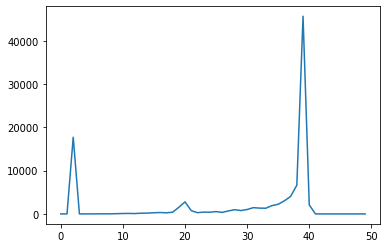

In [30]:
%matplotlib inline
import matplotlib.pyplot as plt
h = createHist(quals)
print(h)
#for i in range(len(h)):
#	print(i)
#	print(h[i])
plt.plot(range(len(h)), h)
plt.show()

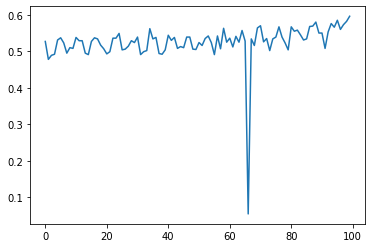

In [31]:
gc = findGCByPos(seqs)
plt.plot(range(len(gc)), gc)
plt.show()

In [33]:
index_min = min(range(len(gc)), key=gc.__getitem__)
index_min

66

In [32]:
# distribution of bases in the sequences
import collections
count = collections.Counter()
for seq in seqs:
    count.update(seq)
count

Counter({'A': 24057, 'C': 29665, 'G': 22888, 'N': 914, 'T': 22476})